# E2a: Küchentischversuch zum Laval-Rotor

Name: Valentin Kämmerer  
Datum: 05.01.2024

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit: 
Wie gut lässt sich mit einem Beschleunigungssensor die Vibrationen von Haushaltsgeräten ermitteln? Lassen sich die gemessenen Beschleunigungen in ihre jeweiligen Frequenzen trennen und darstellen? 

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="figures/Versuch 1.jpg" width="500">

- Beschreibung des Aufbaus: Der Beschleunigungssensor ist auf der Oberseite des Wäschetrockners mit Tesafilm festgeklebt. Der Beschleunigungssensor ist wie vorgegeben mit dem Raspberry Pi verbunden.
- Vorgangsbeschreibung: Der Trockner wird eingeschaltet und beginnt konstant zu rotieren. Dann wird die Messung gestartet, welche 20 Sekunden dauert. Die Messdaten sind dann abgespeichert in der Hdf5 Datei. Die Messung ist damit beendet.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [30]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [31]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240107_134119_ValentinKaemmerer_tumbledryer" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240107_134119_ValentinKaemmerer_tumbledryer.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [32]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240107_134119_ValentinKaemmerer_tumbledryer/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240107_134119_ValentinKaemmerer_tumbledryer/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240107_134119_ValentinKaemmerer_tumbledryer/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeaaf5c-86b7-66d5-9b0c-aab8a8635c40": {
    "type": "probe",
    "name": "tumbledryer",
    "comment": "

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [33]:
#Daten aus der hdf5 Datei ausslesen
hdf5_path = "measurement_data/data_20240107_134119_ValentinKaemmerer_tumbledryer/data_20240107_134119_ValentinKaemmerer_tumbledryer.h5"
f = h5py.File(hdf5_path,'r')
RawData = f["RawData"]
uuid = list(RawData.keys())
sensor_path = "RawData/"+uuid[0]
sensor = f[sensor_path]
acceleration_x = np.array(sensor['acceleration_x'])
acceleration_y = np.array(sensor['acceleration_y'])
acceleration_z = np.array(sensor['acceleration_z'])
time = np.array(sensor['timestamp'])

#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [34]:
#get_vec_accel Funktion anwenden mit den Messwerten der Beschleunigung
amount_acc_vec = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)

#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

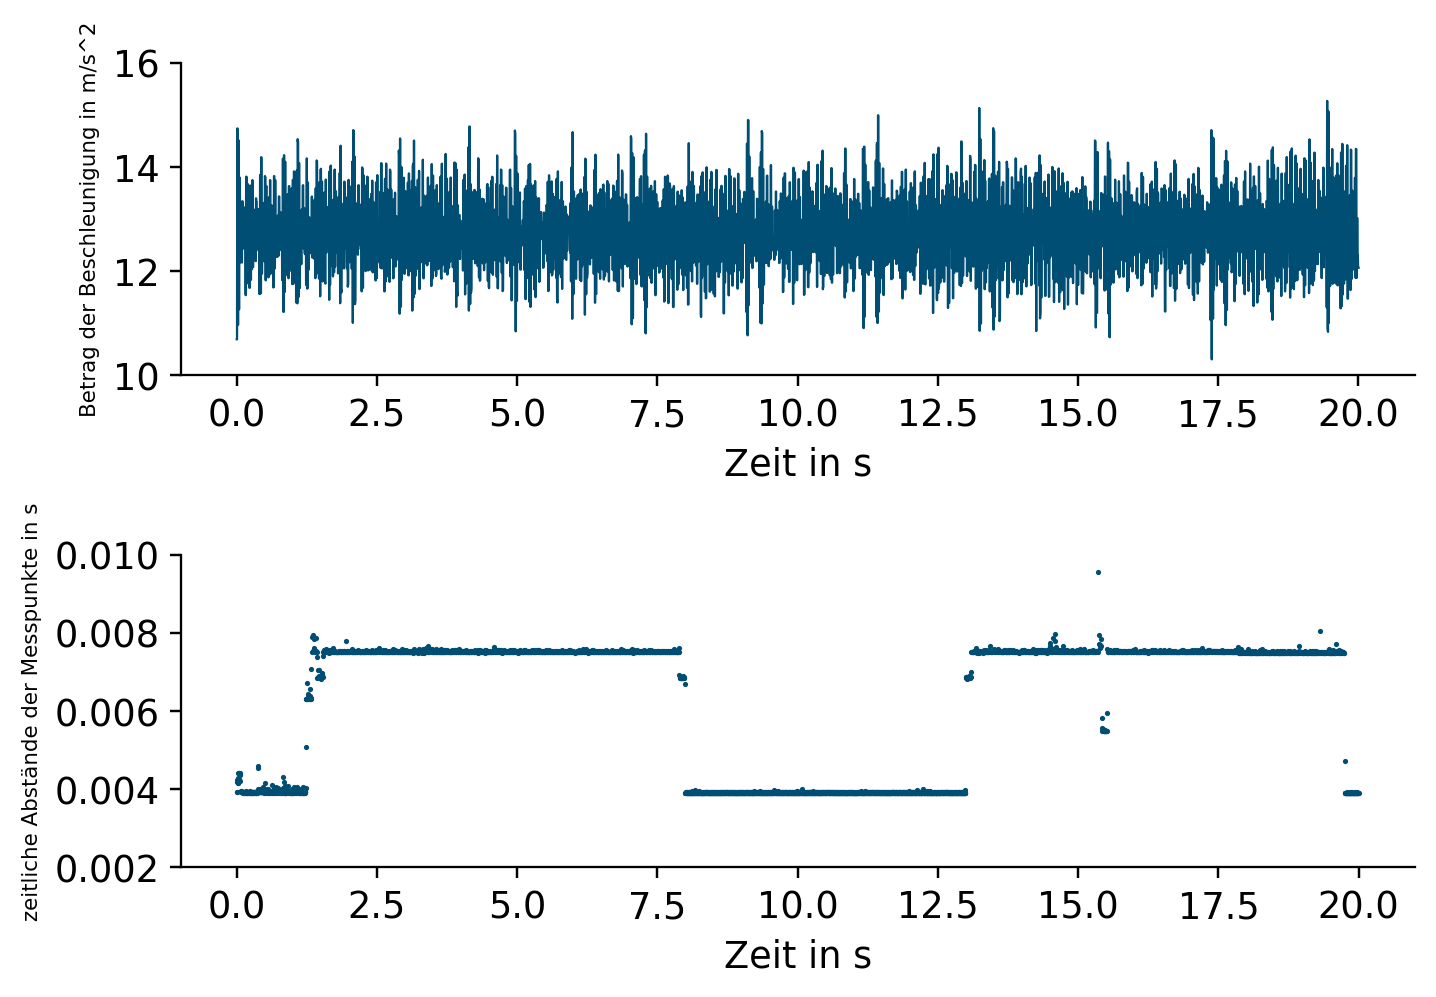

In [35]:
#plotten (mit einem subplot)
#erster plot
plt.subplot(211) 
plt.plot(time, amount_acc_vec)
plt.ylim(10,16)
plt.xlabel("Zeit in s")
plt.ylabel("Betrag der Beschleunigung in m/s^2", fontsize = 7)

#zweiter plot (s=0.5 verkleinert die Punktgröße, damit diese nicht zu groß sind)
plt.subplot(212)
plt.scatter(time[:-1],np.diff(time), s = 0.5)
plt.ylim(0.002,0.01)
plt.xlabel("Zeit in s")
plt.ylabel("zeitliche Abstände der Messpunkte in s", fontsize = 7)

#anpassen, damit alles abgebildet ist und nicht abgeschnitten
plt.tight_layout()

## 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [36]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
#interpolation Funktion anwenden mit den Messdaten (Zeit und Betrag der Beschleunigungen)
interpolation_data = interpolation(time, amount_acc_vec)

#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

In [37]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.

#my_fft() Funktion anwenden (FFT damit durchführen) mit den interpolierten Daten als Input (dadurch erhält man Frequenz und Amplitude)
evenly_distributed_time = interpolation_data[0]
int_data = interpolation_data[1]
amplitude, frequency = my_fft(int_data,evenly_distributed_time)

#plotten 
fig = plt.figure()
plt.xlabel("Frequenz in Hz")
plt.ylabel("Amplitude der Messdaten (interpoliert)")
plt.stem(frequency,amplitude, 'b', markerfmt=" ", basefmt="-b")
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

<StemContainer object of 3 artists>

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="figures/Versuch 2.jpg" width="500">

- Beschreibung des Aufbaus: Der Beschleunigungssensor ist auf der Rückseite des Handys mit Tesafilm festgeklebt. Das Handy liegt auf einem Tisch. Der Beschleunigungssensor ist wie vorgegeben mit dem Raspberry Pi verbunden.
- Vorgangsbeschreibung: Auf dem Handy wird ein Wecker eingestellt, mit einem Klingelton der Vibration enthält (diese ist auch eingeschaltet). Wenn das Handy anfängt zu klingeln, wird die Messung gestartet. Diese stoppt nach 20 Sekunden und speichert die Messdaten in einer hdf5 Datei. Damit ist die Messung beendet.

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [38]:
path_measurement_folder = "measurement_data/data_20240107_152418_ValentinKaemmerer_handy" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240107_152418_ValentinKaemmerer_handy.h5" # replace None by the filename of the hdf5-file

"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))

{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240107_152418_ValentinKaemmerer_handy/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240107_152418_ValentinKaemmerer_handy/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240107_152418_ValentinKaemmerer_handy/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eeaaf99-ee65-6f91-a7e9-33096ca9d5de": {
    "type": "probe",
    "name": "handy",
    "comment": "",
    "path": "measurem

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [39]:
#Daten aus der hdf5 Datei ausslesen
hdf5_path = "measurement_data/data_20240107_152418_ValentinKaemmerer_handy/data_20240107_152418_ValentinKaemmerer_handy.h5"
f = h5py.File(hdf5_path,'r')
RawData = f["RawData"]
uuid = list(RawData.keys())
sensor_path = "RawData/"+uuid[0]
sensor = f[sensor_path]
acceleration_x = np.array(sensor['acceleration_x'])
acceleration_y = np.array(sensor['acceleration_y'])
acceleration_z = np.array(sensor['acceleration_z'])
time = np.array(sensor['timestamp'])

#### 2. Betrag der Beschleunigung berechnen


In [40]:
#get_vec_accel Funktion anwenden mit den Messwerten der Beschleunigung
amount_acc_vec = get_vec_accel(acceleration_x, acceleration_y, acceleration_z)

#### 3. Darstellung der Messdaten

In [41]:
#plotten (mit einem subplot)
#erster plot
plt.subplot(211) 
plt.plot(time, amount_acc_vec)
plt.ylim(11.5,14.5)
plt.xlabel("Zeit in s")
plt.ylabel("Betrag der Beschleunigung in m/s^2", fontsize = 7)

#zweiter plot (s=0.5 verkleinert die Punktgröße, damit diese nicht zu groß sind)
plt.subplot(212)
plt.scatter(time[:-1],np.diff(time), s = 0.5)
plt.ylim(0.002,0.0125)
plt.xlabel("Zeit in s")
plt.ylabel("zeitliche Abstände der Messpunkte in s", fontsize = 7)

#anpassen damit alles abgebildet ist und nicht abgeschnitten
plt.tight_layout()

#### 4. Interpolation der Messwerte



In [42]:
#interpolation Funktion anwenden mit den Messdaten (Zeit und Betrag der Beschleunigungen)
interpolation_data = interpolation(time, amount_acc_vec)

#### 5 & 6. FFT durchführen und graphisch darstellen


<StemContainer object of 3 artists>

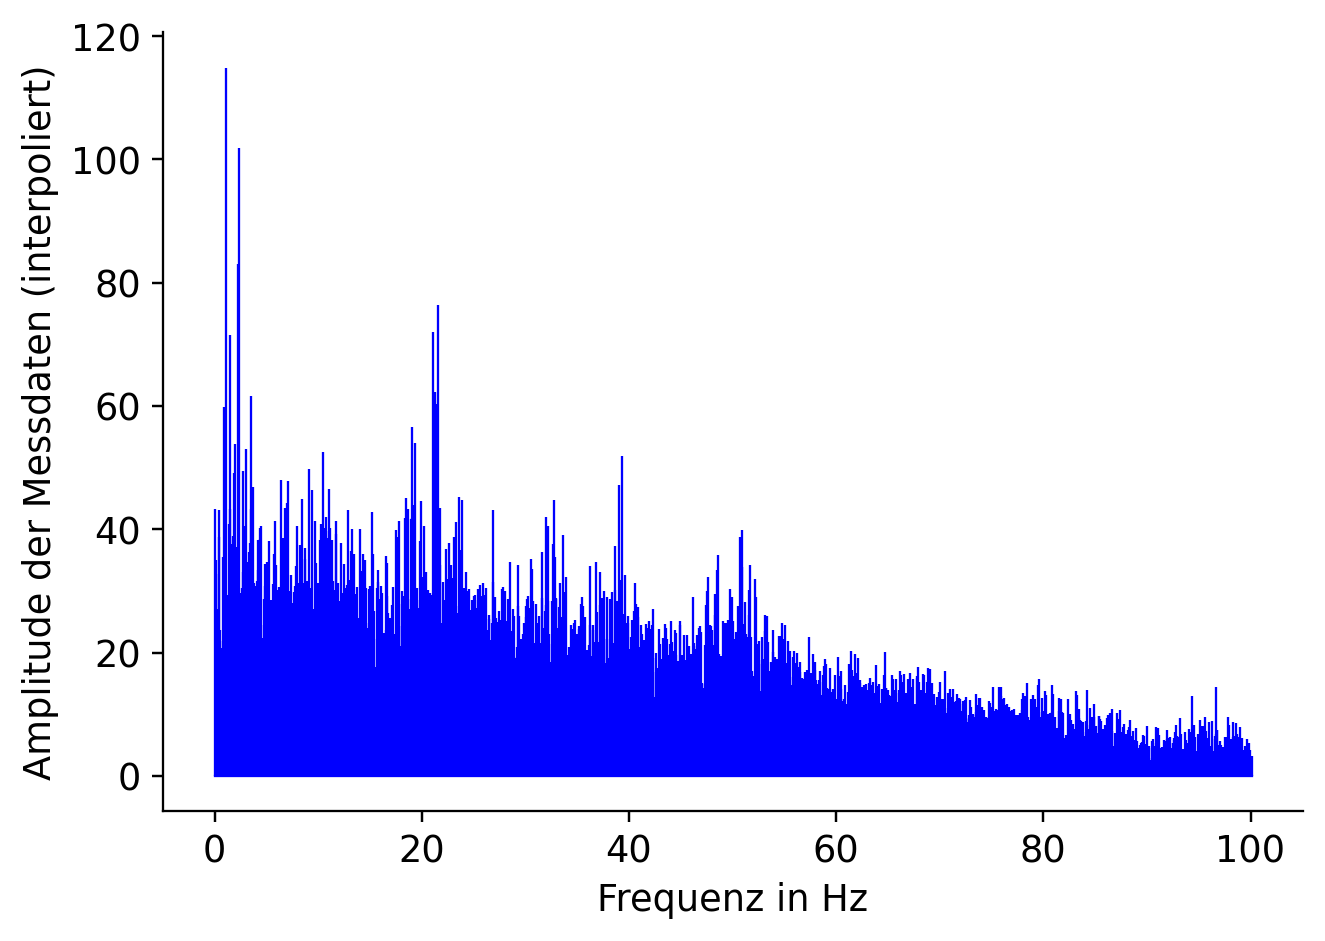

In [43]:
#my_fft() Funktion anwenden (FFT damit durchführen) mit den interpolierten Daten als Input (dadurch erhält man Frequenz und Amplitude)
evenly_distributed_time = interpolation_data[0]
int_data = interpolation_data[1]
amplitude, frequency = my_fft(int_data,evenly_distributed_time)

#plotten 
fig = plt.figure()
plt.xlabel("Frequenz in Hz")
plt.ylabel("Amplitude der Messdaten (interpoliert)")
plt.stem(frequency,amplitude, 'b', markerfmt=" ", basefmt="-b")

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Im ersten Versuch, bei der Messung des Wäschetrockners, sind die Maxima der Amplituden und die dazugehörenden Frequenzen gut erkennbar. Und zwar haben die Frequenzen von 12, 45 und 57 Hertz die größten Amplituden. Die restlichen Amplituden der anderen Frequenzen sind eher gering. Die maximale Frequenz beträgt 90 Hertz. Der generelle Frequenzbereich ist durchaus realistisch, denn die Frequenzen liegen im hörbaren Bereich des Menschen und sind generell nicht übermäßig hoch. Die drei signifikanten Frequenzen von 12, 45 und 57 Hertz scheinen charakteristisch für den Betrieb des Trockners zu sein. Sie könnte relevante Betriebsfrequenzen sein, wie z.B. die Frequenz der Rotation der Wäschetrommel oder auch die Betriebsfrequenz des Elektromotors. Die anderen Frequenzen, welche eher geringe Amplituden besitzen, könnten durch Vibrationen des Trockners (bestimmter Teile darin) hervorgerufen worden sein, welche durch z.B. die Frequenz des Motors angeregt wurden. 

Betrachtet man den zweiten Versuch, also die Messung des Handy Klingeltons, sieht man, dass die Amplituden sich deutlich unterscheiden zu der des Trockners. Doch der Frequenzbereich ist ziemlich ähnlich. Es sind erneut hervorstechende Maxima zu sehen, und zwar bei 2, 21, 38 und 51 Hertz. Der Frequenzbereich ist realitisch für Töne in der Musik (Klingelton ist ja faktisch Musik). Die Werte der Frequenzen schließen eher auf tiefere Töne, was auf den verwendeteten Klingelton zutrifft. Auch wenn ich persönlich auch etwas höhrere Frequenzen erwartet habe. Die Maxima sind dabei die lautesten Töne und bilden wahrscheinlich die Haupttöne des Klingeltons. Die restlichen Frequenzen könnten Hintergrund Töne sein oder Störfaktoren. Grundsätzlich fällt auf, dass die Amplitudenhöhe durchschnittlich höher beim Handy ist als beim Trockner, wodurch auch der Plot dicker abgebildet ist. 

Um auf die Forschungsfragen einzugehen: Die Beschleunigungen ließen sich jeweils gut mit dem Sensor ermittlen. Man konnte aber auch in dem einen plot in beiden Versuchen sehen, dass die zeitlichen Abstände zwischen den Messungen varrieren und der Pi somit nicht ganz so genau ist oder zumindest nicht konstant. Auch wenn diese geringen Abweichungen sicherlich nicht viel an den Ergebnissen geändert haben. Die FFT, also umwandeln der Messdaten in Amplitude und Frequenz, hat gut funktioniert, was zu einem anschaulicheren Ergebnis geführt hat.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Der Versuch hat sehr Spaß gemacht. Generell macht das Arbeiten mit dem Pi und den Sensoren viel Spaß und es ist mal was anderes. Auch die Idee mit Geräten zu Hause zu arbeiten und diese im Betrieb zu messen ist super. Der Aufwand war angemessen und grundsätzlich kam es zu recht wenig Problemen (durch das Arbeiten mit dem Pi auch in den letzten Versuchen ist man auch langsam geübt). Die Hilfestellungen und die Makierungen, wo was zu erledigen ist, waren sehr hilfreich. Auch die Anwendung, dass man nur über die Messungen der Beschleunigung die Frequenzbreite und jeweiligen Amplituden rausbekommt, ist super und das Ergebnis ist anschaulich und ich konnte neues lernen. Sicherlich wird dies in Zukunft auch hilfreich sein, dass ich nun schon mal etwas mit Sensoren gearbeitet und auch Datenauswertung durchgeführt habe.